# Introduction Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're goint to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

## 1. Getting the data ready

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
# Commonly `X` will be the features / Columns in the DataFrame
# and `y` will be the label / Target column in the DataFrame
X = heart_disease.drop("target", axis=1)

y = heart_disease["target"]

## 2. Choose the right estimator/algorithm for our problems

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. Fit the model/algorithm and use it to make predictions on our data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
clf.fit(X_train, y_train);

In [15]:
# Make a prediction
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

## 4. Evaluating a model

In [16]:
clf.score(X_train, y_train)

1.0

In [17]:
clf.score(X_test, y_test)

0.8852459016393442

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.85      0.97      0.91        36

    accuracy                           0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [19]:
print(confusion_matrix(y_test, y_preds))

[[19  6]
 [ 1 35]]


In [20]:
print(accuracy_score(y_test,y_preds))

0.8852459016393442


## 5. Improve a model

In [32]:
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying models with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test) * 100:.2f}%")
    print("")

Trying models with 10 estimators...
Model accuracy on test set: 83.61%

Trying models with 20 estimators...
Model accuracy on test set: 88.52%

Trying models with 30 estimators...
Model accuracy on test set: 83.61%

Trying models with 40 estimators...
Model accuracy on test set: 88.52%

Trying models with 50 estimators...
Model accuracy on test set: 85.25%

Trying models with 60 estimators...
Model accuracy on test set: 90.16%

Trying models with 70 estimators...
Model accuracy on test set: 85.25%

Trying models with 80 estimators...
Model accuracy on test set: 90.16%

Trying models with 90 estimators...
Model accuracy on test set: 85.25%



## 6. Save and load a trained model

In [29]:
import pickle

pickle.dump(clf, open("random_forst_model1.pkl", "wb"))

In [31]:
loaded_model = pickle.load(open("random_forst_model1.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8524590163934426

## 7. Putting it all together

# Actual Scikit-Learn

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:

    1. Split the data into features and labels (usually `X` & `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (also called feature encoding)

In [2]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Use the features column/s to predict `y`
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

# train_test_split will return 4 different values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [11]:
car_sales = pd.read_csv("../data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [12]:
len(car_sales)

1000

In [13]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [15]:
# Split the data
X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Build machine learning model
# RandomForestClassifier is used to classify data
# RandomForestRegressor is used to predict numerical values
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Train the model to the train data | Learn the relationship pattern between X and y 
model.fit(X_train, y_train)

# Score / evaluate the data
model.score(X_test, y_test)

# An error will be encountered in our data set because not all of our data is in numerical values

ValueError: could not convert string to float: 'Nissan'

In [18]:
# Turn the categories into numberes
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Doors was set into categorical_features because it can be divided in cars with 5,4 or 3 doors
categorical_features = ["Make","Colour", "Doors"]

# A process used to convert string to numberical values
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [19]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [20]:
# Graphical example of OneHotEncoder
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [23]:
# Let's refit the model
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [24]:
# Import car sales missing data
car_sales_missing = pd.read_csv("../data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [26]:
# Display sum of data with missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [27]:
# Let's try and convert our data into numbers

# Split the data
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Turn the categories into numberes
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Doors was set into categorical_features because it can be divided in cars with 5,4 or 3 doors
categorical_features = ["Make","Colour", "Doors"]

# A process used to convert string to numberical values
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


ValueError: Input contains NaN

#### Option 1: Fill missing with Pandas

In [28]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [29]:
# Check our dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [30]:
# Romove rows with missing Price value
car_sales_missing.dropna(inplace=True)
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [31]:
len(car_sales_missing)

950

In [33]:
# Let's try and convert our data into numbers

# Split the data
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Turn the categories into numberes
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Doors was set into categorical_features because it can be divided in cars with 5,4 or 3 doors
categorical_features = ["Make","Colour", "Doors"]

# A process used to convert string to numberical values
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Fill missing data with Scikit-Learn

1. Split your data first (into train/test), always keep your training & test data separate
2. Fill/Transform the training set and test sets separately (this goes for filling data with pandas as well)
3. Don't use data from future (test set) tp fill data from the past (training set)

In [46]:
# Reinitialize dataframe

car_sales_missing = pd.read_csv('../data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [47]:
# Confirm if there is/are missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [52]:
# Remove rows with missing in the "Price" column
car_sales_missing.dropna(subset=["Price"], inplace=True)

# Split data into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test set
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [53]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value='missing')
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make","Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Note: We use fit_transform() on the training data and transform() on the testing data. 
# In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). 
# Then we take those same patterns and fill the test set (transform only).

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [55]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                     columns=["Make","Colour","Doors","Odometer (KM)"]
                                     )

car_sales_filled_test = pd.DataFrame(filled_X_test,
                                    columns=["Make","Colour","Doors","Odometer (KM)"]
                                    )

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [57]:
# Check original dataframe
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [59]:
# Let's one hot encode the features with the same code as before
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")

# Fill train and test values separately
trans_X_train = transformer.fit_transform(car_sales_filled_train)
trans_X_test = transformer.transform(car_sales_filled_test)

# Check transformed and filled X_train
trans_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [60]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use tranformed (filled and one-hot encoded X data)
model.fit(trans_X_train, y_train)
model.score(trans_X_test, y_test)

0.21229043336119102

## 2. Choosing the right estimator / algorithm for our problem

Scikit-Learn uses estimator as another term for machine learning model or algorithm.

 * Classification - predicting whether a sample is one thing or another
 * Regression - predicting a number
 
 Step 1: Check the scikit-learn map...
 
 https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regressin problem

In [2]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [6]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
# How many samples?
len(boston_df)

506

In [9]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Split data fron X and y
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Instantiate Ridge model

model = Ridge()

model.fit(X_train, y_train)

# Model score
model.score(X_test, y_test)

0.6662221670168522

In [12]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split data into X and y
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestRegressor for our model
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.873969014117403

### 2.2 Choosing an estimator for a classification problem

Let's got to the map... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [13]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [23]:
# import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Split data for X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data for train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

c:\users\lemirser\.virtualenvs\machinelearning-ezqqqo5y\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.4918032786885246

In [24]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [27]:
# Let's use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split the data for X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data for train and test set
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Evaluate the model
rfc.score(X_test, y_test)W

0.8524590163934426

Tidbit:
    
    1. If you have structured data, used ensemble method.
    2. If you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, features variables, data
* `y` = labesl, targets, target variables

In [36]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Import dataset
heart_disease = pd.read_csv('../data/heart-disease.csv')

# Split data for X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data for train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

# Evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

In [29]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [30]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using a machine learning model

2 main ways to make predictions:

1. `predict()`
2. `predict_proba()`

In [31]:
# Use a trained model to make predictions
clf.predict(np.array([1, 7, 8, 2, 3])) # this doesn't work...

ValueError: Expected 2D array, got 1D array instead:
array=[1 7 8 2 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [33]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [34]:
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
# Comopare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [39]:
clf.score(X_test, y_test)

0.8524590163934426

Make predictions with `predict_proba()`

In [42]:
# predict_proba() returns probabilities of a classifications label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [43]:
# Let's predict() on the same data..
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Import boston dataframe
boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])

# Split data for X and y
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split data for train and data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Intantiate RandomForestRegressor and fit model
model = RandomForestRegressor().fit(X_train, y_train)
# model.fit(X_train, y_train)

# Make prediction from the data set
y_preds = model.predict(X_test)


In [9]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [11]:
np.array(y_test[:10])

array([[23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8]])

In [12]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

# On average the prediction is [VALUE OF mean_absolute_error] away from the truth

2.1226372549019623

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluating a model with `score` method

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Generate dataframe
heart_disease = pd.read_csv("../data/heart-disease.csv")


# Split data into X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instentiate and fit our model
model = RandomForestClassifier().fit(X_train, y_train)
model.score(X_test, y_test)

0.8524590163934426

In [16]:
# Let's use regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Import Data set
heart_disease = pd.read_csv("../data/heart-disease.csv")

# Split data into X and y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and fit our model
model = RandomForestRegressor().fit(X_train,y_train)
model.score(X_test, y_test)

0.47535348583878

### 4.2 Evaluating a model using the `scoring` parameter

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# import data
heart_disease = pd.read_csv("../data/heart-disease.csv")

# Split the data into X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data for train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize and fit our model
clf = RandomForestClassifier().fit(X_train, y_train);

Comparison between `score` and `cross_val_score`

In [26]:
clf.score(X_test, y_test)

0.8524590163934426

In [20]:
cross_val_score(clf, X, y)

array([0.83606557, 0.8852459 , 0.83606557, 0.85      , 0.75      ])

In [27]:
np.random.seed(42)

# single traingin and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation-score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [ ]:
# Default scoring parameter of classifier = mean accuracy

In [28]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [31]:
# Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Import our dataset
heart_disease = pd.read_csv("../data/heart-disease.csv")

# Split our data for X and y
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# Split our data for train and test set
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initialize and cross validate our data
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv=5)

In [32]:
# Get a mean accuracy of the model
np.mean(cross_val_score)

0.8248087431693989

Accuracy is given a random sample, how likely is it to predict the right label.

In [34]:
print(f"Heart Disease Classifier Cross-Validation Accuracy: {np.mean(cross_val_score) * 100:.2f}%.")

Heart Disease Classifier Cross-Validation Accuracy: 82.48%.


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of a model's `true positive rate` (tpr) versus a model's `false positive rate` (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [41]:
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Set random seed
np.random.seed(42)

# Import our data set
heart_disease = pd.read_csv("../data/heart-disease.csv")

# Split our data for X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split our data for train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize RandomForestClassifier and fit the train data
clf = RandomForestClassifier().fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [43]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [46]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

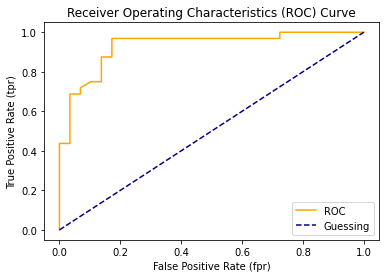

In [52]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr: list, tpr: list):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    
    #Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customizing the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr);

In [53]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

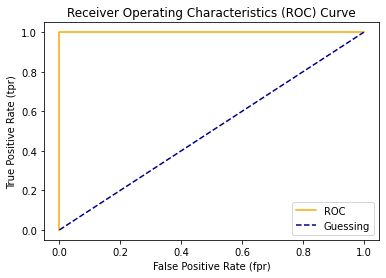

In [54]:
# Plot perfect ROC curve and AUS score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [55]:
# Perfect AUS score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [56]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [57]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,y_preds,rownames=["Actual Labels"], colnames=["Predictive Lables"])

Predictive Lables,0,1
Actual Labels,,
0,24,5
1,4,28


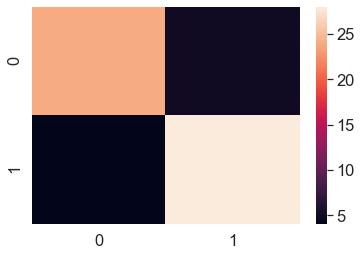

In [58]:
# Make our confusion matrix more visual with Seaborn's heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

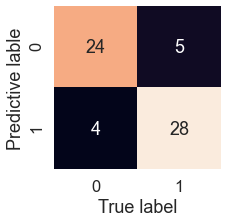

In [60]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True, # Annotate the boxes with conf_mat info
                    cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("Predictive lable")

plot_conf_mat(conf_mat);

**Classification Report**

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [72]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds,output_dict=True)
            )

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse thatn false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html
    
1. R^2 (pronounced r-squared) or coefficient of determination.
2. Mean absolute error (MAE).
3. Mean squared error (MSE).

**R^2**

What R^2 does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value woud be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr = RandomForestRegressor().fit(X_train, y_train)

In [76]:
rfr.score(X_test, y_test)

0.873969014117403

In [83]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [78]:
r2_score(y_test, y_test_mean)

0.0

In [79]:
r2_score(y_test, y_test)

1.0

**Mean absolute error (MAE)**

MAE is the average of the absolute difference between predictions and actual values. It gives you an idea of how wrong your models predictions are.

In [84]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

# Evaluation models always predict prediction data to truth data
y_preds = rfr.predict(X_test)
mae= mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [92]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df["difference"] = df["predicted values"] - df["actual values"]
# df["difference"].abs().mean() == 2.1226372549019623
df

,actual values,predicted values,difference
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


**Mean squared error (MSE)**

In [98]:
# Mean squared error
from sklearn.metrics import mean_squared_error
np.random.seed(42)
y_preds = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [99]:
df1 = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df1["difference"] = df1["predicted values"] - df1["actual values"]
df1

,actual values,predicted values,difference
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


In [102]:
# Calculate MSE by hand
squared = np.square(df1["difference"])
squared.mean()

9.242328990196082

 Tidbit for Regression models:
 
        Minimize MSE and MAE while maximizing R^2.

### 4.2.3 Finally using the `scoring` parameter

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

heart_disease = pd.read_csv("../data/heart-disease.csv")

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [11]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [12]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [13]:
np.random.seed(42)

cv_acc = cross_val_score(clf,X,y, cv=5, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [14]:
#Precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8329547346025924

In [15]:
# Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [16]:
# F1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8298583662714097

How about our regression model?

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston


np.random.seed(42)

boston = load_boston()
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

rfr = RandomForestRegressor()

In [20]:
np.random.seed(42)

cv_r2 = cross_val_score(rfr, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.622375083951403

In [21]:
# R^2
np.random.seed(42)

cv_r2 = cross_val_score(rfr, X, y, cv=5, scoring="r2")
np.mean(cv_r2)

0.622375083951403

In [22]:
# Mean absolute error
# The closer to zero the better
cv_mae = cross_val_score(rfr, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [23]:
# Mean squared error
cv_mse = cross_val_score(rfr, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.02253826604542

### 4.3 Using different evaluation metrics as Scikit-Learn functions

**Classification evaluation functions**

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)

# Make some predictions
y_preds = model_rfc.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set.")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%.")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f}%.")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f}%.")
print(f"F1: {f1_score(y_test, y_preds)*100:.2f}%.")

Classifier metrics on the test set.
Accuracy: 85.25%.
Precision: 84.85%.
Recall: 87.50%.
F1: 86.15%.


In [25]:
# Default is mean accuracy
model_rfc.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

**Regression evaluation function**

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model_rfr = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model_rfr.predict(X_test)

# Evaluate using the metric functions
print("Regressor metrics on the test set.")
print(f"R^2: {r2_score(y_test, y_preds) * 100:.2f}%.")
print(f"MAE: {mean_absolute_error(y_test, y_preds) * 100 : .2f}%.")
print(f"MSE: {mean_squared_error(y_test, y_preds) * 100 : .2f}%.")

Regressor metrics on the test set.
R^2: 87.40%.
MAE:  212.26%.
MSE:  924.23%.


In [27]:
# Default is to return the coefficient of determination R^2 of the prediction
model_rfr.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more datam the better)
* Could we improve our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs Parameters
* Parameters = model find theses patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [29]:
# Get the list of Hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets:
* Training
* Validation
* Test

In [30]:
# Get the list of Hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [31]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels on a classification model.
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
                    "accuracy": round(accuracy, 2),
                    "precision": round(precision, 2),
                    "recall": round(recall, 2),
                    "f1": round(f1, 2)
                    }
    
    print(f"Accuracy: {accuracy * 100 : .2f}.")
    print(f"Precision: {precision:.2f}.")
    print(f"Recall: {recall:.2f}.")
    print(f"F1: {f1:.2f}.")
    
    return metric_dict

In [32]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy:  82.22.
Precision: 0.81.
Recall: 0.88.
F1: 0.85.


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [33]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [34]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=1000)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Accuracy:  82.22.
Precision: 0.81.
Recall: 0.88.
F1: 0.85.


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [35]:
clf_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
np.random.seed(42)
clf_3 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)
clf_3.fit(X_train,y_train)

y_preds_3 = clf_3.predict(X_valid)

clf_3_metrics = evaluate_preds(y_valid, y_preds_3)
clf_3_metrics

Accuracy:  80.00.
Precision: 0.81.
Recall: 0.84.
F1: 0.82.


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

grid = {"n_estimators":[10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20,30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split data into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10, # number of models to try
                           cv=5,
                           verbose=2)
# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   0.4s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=4, max_features=sqrt, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samples_lea

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


In [38]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}

In [39]:
# Make predictions with the best hyperparameters

rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy:  83.61.
Precision: 0.87.
Recall: 0.82.
F1: 0.84.
